# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab __does not move__.

When the light is __green__, the rewards are __negative__ (higher in magnitude when there's no oncoming traffic), as the agent is expected to be moving, and when the light is __red__ the rewards are __positive__, as the agent is expected to be  and is idle in this case. The magnitude of rewards in varies approximately between -4 to -6 and 0 to 3 respectively.

There are dummy agents all over the place, and they are in motion. There is no deadline being enforced, so it seems that the trial will continue until the hard time limit (about 100 or so steps).

There are no accidents.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- In the __agent.py__ Python file:
    - __enforce_deadline__: set on the environment object to enable or disable a 'deadline'
        > __enabled__: the trial fails if the agent does not reach the destination within a specified period of time

        > __disabled__: the trial won't complete until the agent reaches the destination or hits the __hard_time_limit__ defined in the Environment class    

    - __epsilon__: the (Random) Exploration Factor - a continuous value between 0 and 1 (inclusive)
        > __higher values__ (close to 1) mean more __exploration__ 

        > __lower values__ (close to 0) mean more __exploitation__ 

    - __tolerance__: the __minimum exploration factor__ before testing begins
        > the value of the exploration factor is supposed to _'decay'_ until this value is reached

- In the __environment.py__ Python file, when an agent performs an action:
    > The Environment class method __act()__ is called

- In the  __simulator.py__ Python file:
    - __render_text()__ - the non-GUI render, displays text
    > this method displays trial data in the terminal / command prompt
    - __render()__ - the GUI render
    > if the __display__ flag is set to _True_ in _agent.py_, this method is used to render a GUI using Pygame 

- In the __planner.py__ Python file:
    > the __next_waypoint()__ function considers __East-West direction__ first (as evidenced by the dx != 0 being checked before dy != 0)

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


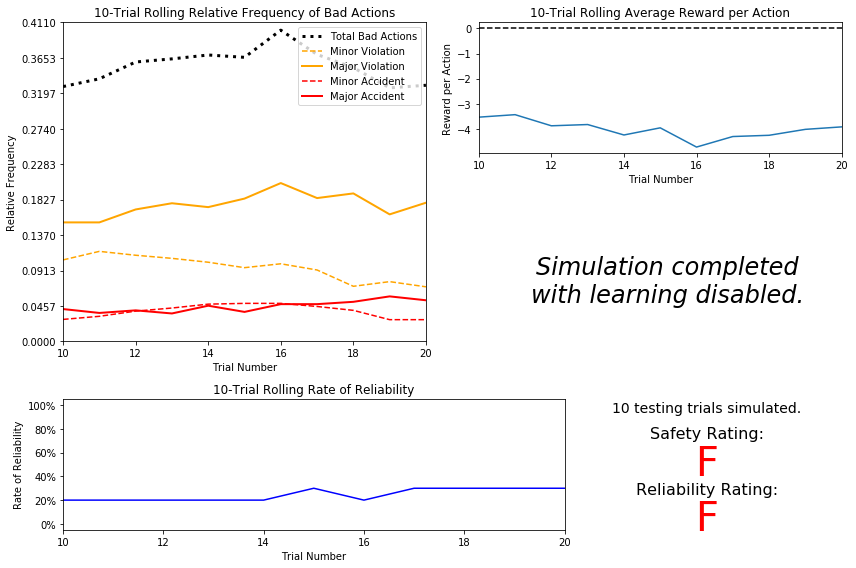

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

I ran the simulation with these settings __thrice__, and decided to stick with the third one because it was the only one in which there was __at least one successful trial__. Amazingly, there wasn't just one, there were __five successful training trials__ and __one successful testing trial__, as can be seen below:

In [3]:
from extras import read_csv
df_basic = read_csv('sim_no-learning.csv')

from IPython.display import display

print '\nSuccessful Trials: ' + str(len(df_basic[df_basic['success']==1]))
display(df_basic[
    df_basic['success']==1]
        [['testing','initial_deadline','final_deadline', 'net_reward', 'average_reward', 'reliability_rate','good_actions']])

print '\nUnsuccessful Trials: ' + str(len(df_basic[df_basic['success']==0]))
display(df_basic[
    df_basic['success']==0]
        [['testing','initial_deadline','final_deadline', 'net_reward', 'average_reward', 'reliability_rate','good_actions']])


Successful Trials: 6


,testing,initial_deadline,final_deadline,net_reward,average_reward,reliability_rate,good_actions
5,False,20,16,7.583722,NaN,NaN,4
7,False,25,5,-92.046632,NaN,NaN,11
14,False,20,0,-30.269673,-3.953584,30.0,15
16,False,20,14,0.626385,-4.298909,30.0,5
17,False,25,0,-102.764233,-4.249733,30.0,18
28,True,20,3,-78.798750,-4.778151,10.0,12



Unsuccessful Trials: 24


,testing,initial_deadline,final_deadline,net_reward,average_reward,reliability_rate,good_actions
0,False,20,0,-77.144014,NaN,NaN,14
1,False,30,0,-130.856142,NaN,NaN,20
2,False,25,0,-64.833224,NaN,NaN,18
3,False,20,0,-38.746950,NaN,NaN,14
4,False,25,0,-108.802013,NaN,NaN,18
6,False,25,0,-102.035130,NaN,NaN,13
8,False,25,0,-211.879075,NaN,NaN,11
9,False,20,0,-58.549649,-3.529228,20.0,14
10,False,25,0,-71.666098,-3.430172,20.0,15
11,False,20,0,-175.674101,-3.872356,20.0,9


It is difficult to say exactly how frequently the driving agent is making bad decisions. In the previous two simulations (not-documented), where there were __no successful trials__, the bad decisions ranged between 35% to 45%, and 40% to 50% of the time respectively. 

In this simulation,  it's between 32% to 42%. Given that the agent is driving randomly, I would say that these inconsistencies are to be expected. It's not an exact average, but I think __about 40% of the time, the agent makes bad decisions__. Due to these bad decisions, __accidents happen about 25% of the time__ (taking about .05 + .05 out of .4 for this simulation). This: 25% of the bad decisions causing accidents, was approximately the same in the previous two simulations.

Speaking of driving randomly, the __rate of reliability__ sort of does and doesn't make sense at the same time. That's because during the first two simulations, none of the trials were successful, so the rate was constant at 0%. In this third one, a quarter of the training trials were successful. This inconsistency can be attributed to the randomness, however,  there is something of note:

> I could be wrong here, but I believe that if some of the external factors (such as deadlines and dummy agents) were eliminated, then given enough trials (perhaps about a 1000 training trials), the rate of reliability may turn out to be 25% (as in this case) if we were to choose 1 action randomly out of the 4 possible actions, a 25% chance. *Is this correct?*

As for __rewards and penalties__, consider two of the training trials, __trial # 5__ and __trial # 8__, the former seems to be really fortunate. If I'm not wrong, then from what I gather from the recorded data, it seems that the agent spawned close to the destination, and __took 4 actions, all of which were *good*__ 
> good_actions = 4, initial_deadline = 20 and final_deadline = 16

It has a total reward of 7.583722, a positive for each *good* action.

The latter has a net reward of -211, the lowest of all trials. More than half of the actions the agent took during this trial were bad (good_actions = 11, total actions would have been 25). The average net_reward is:

In [4]:
print 'Average net_reward: ' + str(df_basic['net_reward'].mean())

Average net_reward: -100.831597708


While '_heavily_' has not been defined, I would say that since in some cases the __net_penalty is almost double of the average net_reward__, in those cases the agent is heavily penalized. 

While abstracted away at the moment, it's very likely that those trials that have average or less than average net_penalty (what I mean here is that the value of __net_reward is close to or >= the average__) may have a majority of good actions, while also having experienced accidents. __Trial # 17__ may be one such example. It reached the destination, and has more than half of the actions as 'good', but the penalty (or reward) is __-102__. It may have run into an accident(s).

As the __number of trials__ increase, the agent's actions remain as random as they were before, so the outcome remains as random as it was earlier. There aren't any significant changes to note (such as number of bad decisions increasing or decreasing noticeably). The average reward / penalty per action also remains more or less the same.

This Smartcab would __neither__ be considered __safe, nor__ would it be considered __reliable__. It's not a 'smart' cab. It's actions are luck of the draw, and a considerable portion of those draws could lead to traffic violations or accidents. The chance of reaching the destination is also very small.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The relevant features are:
- **waypoint**: this feature is relevant for efficiency, as driving in the direction given by this feature would lead the Smartcab to the destination. Not following the way point *may* lead it further away from the destination.
- **intersection inputs**: all but one of the sensor inputs are relevant for the current situation 
    - **light**: for *safety* reasons, and for following the "rules of the universe", we need this feature, as the agent needs to "properly idle at a red light". It is also possible for it to turn right in this case (this saves time, improves reliability/efficiency), as below:
    - **left**: there are two cases to consider here, if the *light for the Smartcab* is:
    > **'red':** the Smartcab can either make a right turn, or it shouldn't move. If it decides to make a right turn, and there is a vehicle on the left that is moving 'forward', the Smartcab should yield the right of way
    
    > **'green':** if there is a car on the left, it would have a red light and thus, it should not move; the Smartcab would have the right of way
    
    This feature (**left**) is thus relevant for *efficiency* as well as *safety*. If this feature is not considered relevant, the Smartcab will be safe, but not as efficient as it can be. It would learn to stop when the light is red. But if this feature is considered, the smartcab would become a bit more efficient, it would learn to safely turn right at a red light. This is because (and this a bit of a conjecture, but from what I understand) if this feature is not considered relevant, the agent would not be able to figure out when turning right would cause an accident and when it wouldn't. Being unable to figure this out, it may opt to not turn right at all. *Is this correct?*
    
    - **~~right~~**: in a similar vein, the **'Smartcab' becomes the 'vehicle on the left'**. As discussed above, when the light for the Smartcab is 'green', the smartcab would have the right of way if it wishes to move forward (as the vehicle on the right would have a red light). If the light for the Smartcab is 'red', it shouldn't head in the 'forward' or 'left' directions, it can only stay idle or turn right, and these cases are already handled by the features 'light' and 'left'. This feature is thus not relevant in the current setup of the environment.
    - **oncoming**: if there is a vehicle across the intersection, and it is moving 'forward' or 'right' while the Smartcab wishes to turn 'left', the Smartcab would have to yield the right of way. If both, this vehicle as well as the Smartcab, are heading 'forward' or 'left', they can attempt to do so. This feature is thus relevant for learning safety, as it would help learn this rule.   
    
    
- **~~deadline~~**: this feature could have been relevant for improving efficiency if there were multiple waypoints available (with possible future rewards and units of time until destination). For example: 
> Suppose that the agent has two values for waypoint: 'forward' and 'right'; assume that each action takes '1' unit of time, and that rewards and time are inversely proportional. So if the agent knows that reaching the destination through the 'forward' waypoint would take 4 units of time (reward = 1/4 = .25), and throught 'right' would take 5 units of time (reward = 1/5 =.20), then:
> 
> At a red light where it can't move 'forward', instead of idling for 1 or more units of time, the agent could choose to turn 'right', as it may save some time (and offer the same reward anyway) and thus make the 'deadline' feature relevant. If the agent could be told or could understand that (say) only '6' more units of time are available and idling too long at an intersection would definitely cause the trial to fail, perhaps it could learn to choose the alternative option in such conditions.
>
> However, that is not the case: we only have one waypoint, and we do not know how much time it would take to reach the destination if a path is followed. This feature is currently not relevant, and using it would just force us to increase the number of training trials to cover our bases.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The selected features are **waypoint**, **light**, **left** and **oncoming**, where:
- **waypoint** $ \in \{left, right, forward\} \Rightarrow \left\vert{waypoint}\right\vert = 3^\ast $
- **light** $ \in \{red, green\}  \Rightarrow \left\vert{light}\right\vert = 2 $ 
- **left** $ \in \{None, left, right, forward\}  \Rightarrow \left\vert{left}\right\vert = 4 $
- **oncoming** $ \in  \{None, left, right, forward\}   	\Rightarrow \left\vert{oncoming}\right\vert = 4 $

\*  *(waypoint = 'None' only occurs at destination)*


So, we have a total of $ 3 * 2 * 4 * 4 = 96 $ states

I think it would be possible for the agent to learn a policy for each possible state with about a 1000 training trials. That seems like a reasonable number.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

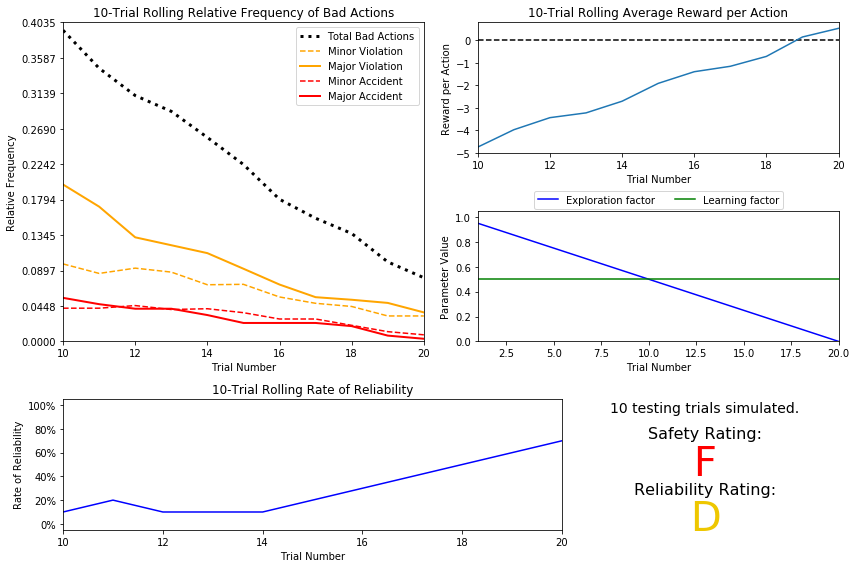

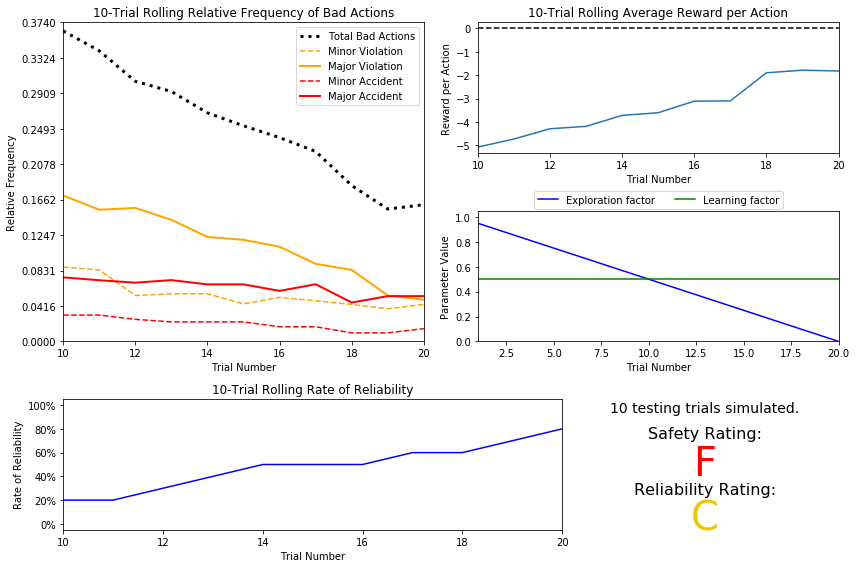

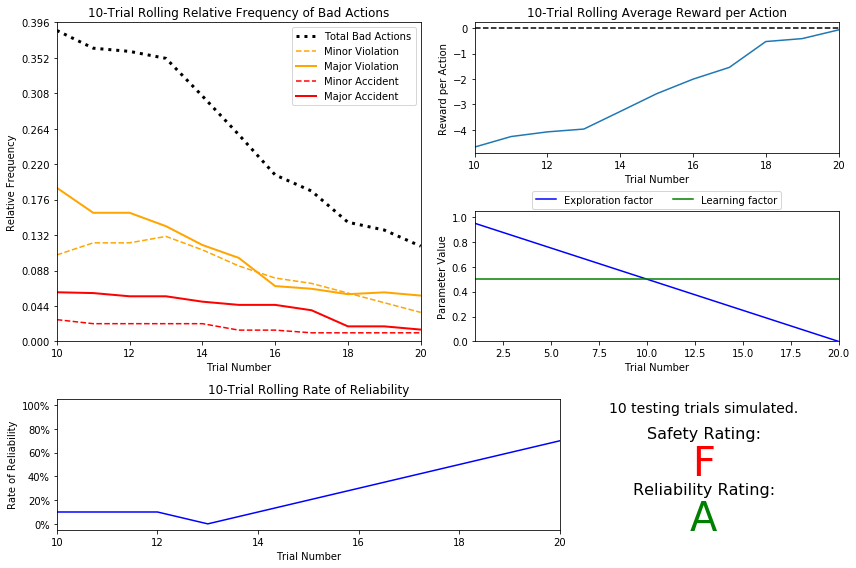

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_1.csv')
vs.plot_trials('sim_default-learning_2.csv')
vs.plot_trials('sim_default-learning_3.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

As was the case with the basic driving agent, the simulation for the default Q-Learning agent was also run thrice, and it seems like the agent **did learn _something_**. The agent starts out similar to the basic agent, with a low / random rate of reliability and a 40% chance of bad actions; and after a few trials, it seems to 'learn' that accidents are something to avoid if possible. The change is not very drastic, but given enough training trials, it should be.

In [6]:
print 'These are details from the third simulation:'

df_default = read_csv('sim_default-learning_3.csv')

print '\nSuccessful Trials: ' + str(len(df_default[df_default.success==1]))
display(df_default[
    df_default['success']==1]
        [['testing','initial_deadline','final_deadline', 'net_reward', 'average_reward', 'reliability_rate','good_actions']])

print '\nUnsuccessful Trials: ' + str(len(df_default[df_default['success']==0]))
display(df_default[
    df_default['success']==0]
        [['testing','initial_deadline','final_deadline', 'net_reward', 'average_reward', 'reliability_rate','good_actions']])

These are details from the third simulation:

Successful Trials: 17


,testing,initial_deadline,final_deadline,net_reward,average_reward,reliability_rate,good_actions
2,False,25,13,-3.997258,NaN,NaN,10
13,False,30,15,-7.778044,-3.279329,10.0,13
14,False,20,11,18.211467,-2.579422,20.0,9
15,False,20,15,9.501551,-2.005300,30.0,5
16,False,20,5,-27.650071,-1.540146,40.0,13
17,False,25,6,20.114591,-0.521311,50.0,18
18,False,25,18,0.919403,-0.405402,60.0,6
19,False,25,13,22.482186,-0.062148,70.0,12
20,True,30,19,10.338734,0.230060,80.0,10
21,True,20,9,20.734356,0.822312,90.0,11



Unsuccessful Trials: 13


,testing,initial_deadline,final_deadline,net_reward,average_reward,reliability_rate,good_actions
0,False,20,0,-122.542475,NaN,NaN,10
1,False,25,0,-147.180341,NaN,NaN,15
3,False,30,0,-223.662798,NaN,NaN,12
4,False,25,0,-124.389441,NaN,NaN,13
5,False,20,0,-76.818210,NaN,NaN,10
6,False,30,0,-194.846244,NaN,NaN,20
7,False,25,0,-228.242123,NaN,NaN,14
8,False,25,0,-25.693610,NaN,NaN,19
9,False,25,0,-38.975703,-4.683069,10.0,20
10,False,25,0,-49.554883,-4.268576,10.0,18


In [7]:
print 'Average net_reward: ' + str(df_default['net_reward'].mean())

Average net_reward: -42.5794291584


The three simulations do emphasize how much effect the randomness still has over the agent. The first two simulations have a low reliability grade for the Testing Trials, while the third one has an A (at least 90% reached the destination, and that's correct, only 1 testing trial did not succeed in this simulation).

In all three cases, the frequency of bad actions decreased to below 20% of the time. The safety grade, however, is still 'F' as there was at least one major accident in each case. It is possible that if a few more simulations are run (without modification to the current logic), there may turn out to be one where there is no major accident, but it would be by chance, not by intention. It should be noted that this is the same as saying that it is possible for the *basic agent* to receive A+ grades in both safety and reliability, even though the likelihood of that happening through pure randomness is incredibly low.

In other words, while the Q-learning agent is better than the basic agent, its not good enough.

The **'learning'** part of the implementation is *complete*. It's the **training** that is *lacking*. The decaying function implemented for  $ \epsilon $ (*the exploration factor*) is linear (this has been captured properly in the visualization for each of the three simulations above).

The epsilon-tolerance of $0.05$, and the decaying function:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

together imply 20 training trials, as the value of $ \epsilon $ goes from 1 to 0.05; the **number of training trials** thus **does make sense**.

As mentioned earlier, the default agent started from the same precipice as the basic agent. After a few trials, though, it did slide down a bit: the frequency of bad actions about halved, and the average reward increased as well. While the current output is still not acceptable, with enough training, it should be.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [8]:
from IPython.display import Markdown
def md(anything): 
    display(Markdown(anything))

### Linear Decay:

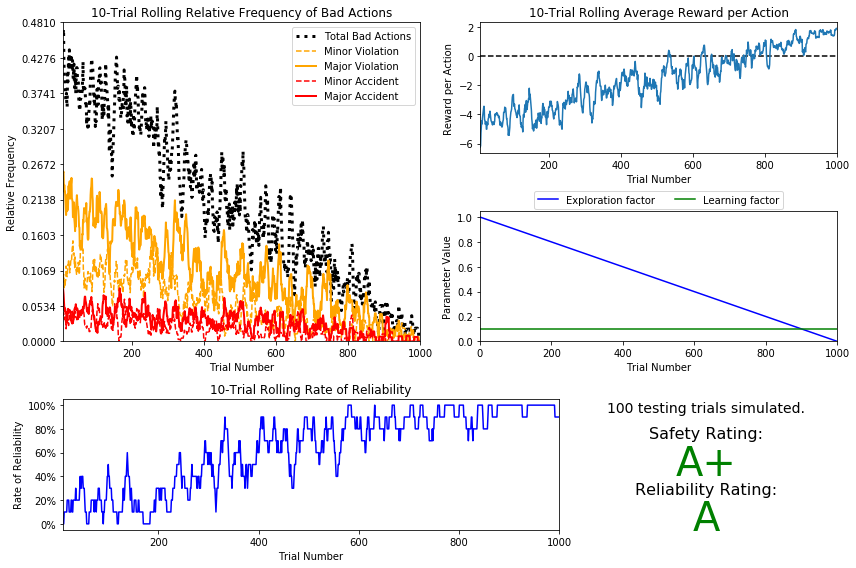

### Cosine Decay:

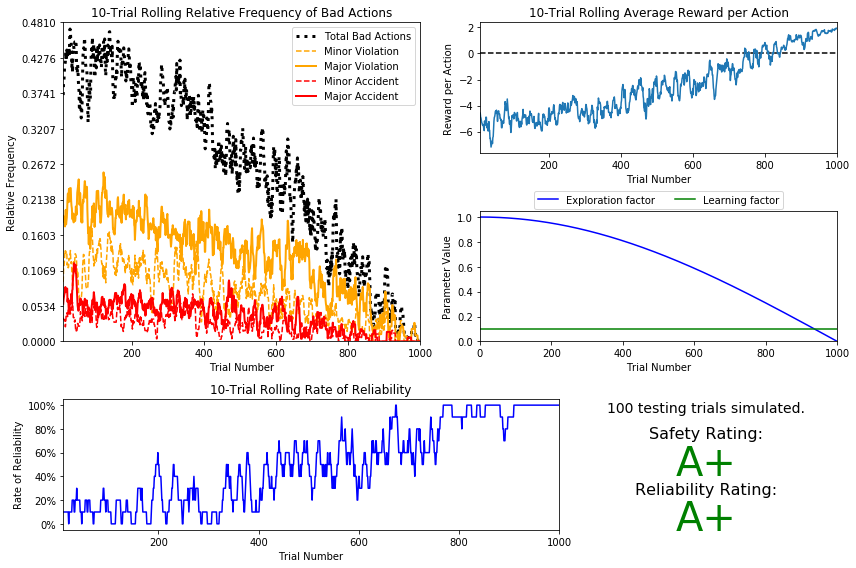

### Modified Cosine Decay:

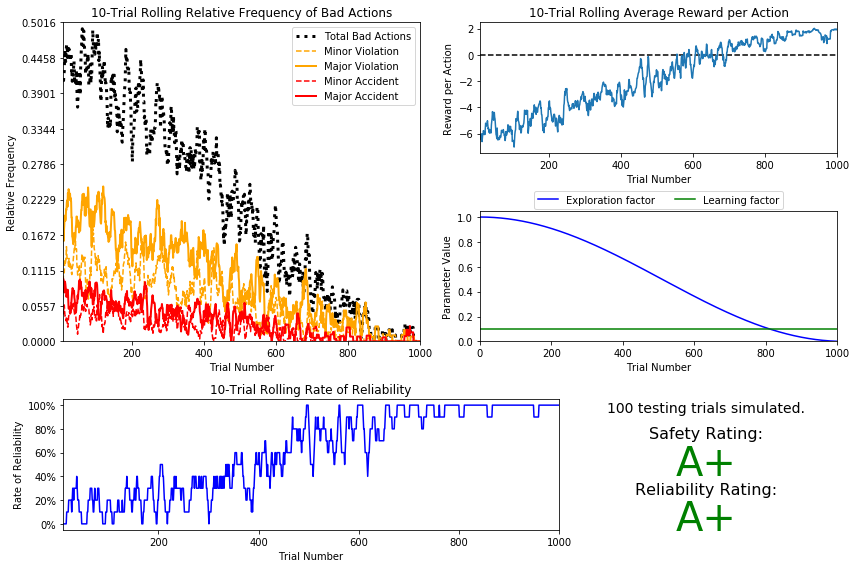

### Exponential Decay:

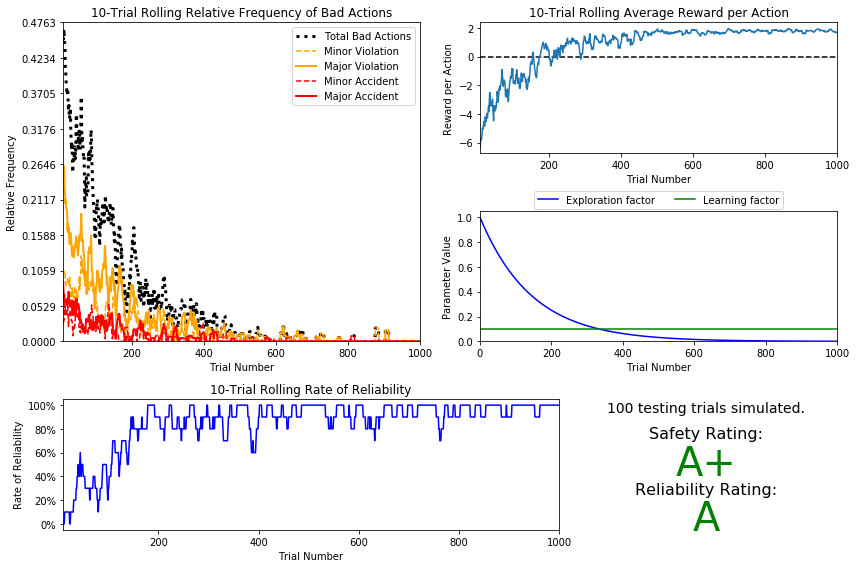

In [9]:

# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
md('### Linear Decay:')
vs.plot_trials('sim_improved-learning.csv')
md('### Cosine Decay:')
vs.plot_trials('sim_improved-learning-cos.csv')
md('### Modified Cosine Decay:')
vs.plot_trials('sim_improved-learning-modified-cos.csv')
md('### Exponential Decay:')
vs.plot_trials('sim_improved-learning-exp.csv')


The following decay functions were used: 
Number of trials: 1000


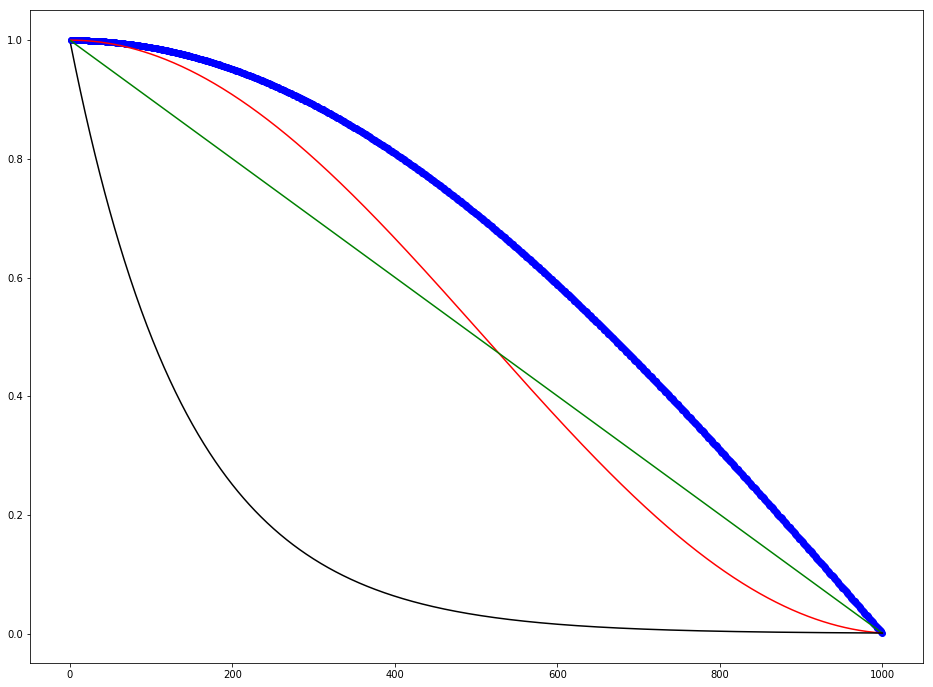

In [10]:
import matplotlib.pyplot as plt

def plot_functions():
    import math
    t = 0
    e1 = 1
    e2 = 1
    e3 = 1
    e4 = 1
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    while e3 > .001:
        t += 1
        
#         3140
#         e1 = math.cos(.0005 * t)
#         e2 = .5 * math.cos(t * .0009804) + .5
#         e3 -= 0.0003182
#         e4 = math.exp(-.0022 * t)     

#       1000 for each
        e1 = math.cos(.00157 * t)
        e2 = .5 * math.cos(t * .00308) + .5
        e3 -= 0.0009991
        e4 = math.exp(-.00691 * t)     
        
        x.append(t)
        y1.append(e1)
        y2.append(e2)
        y3.append(e3)
        y4.append(e4)

    print('\nThe following decay functions were used: ')
    print 'Number of trials: ' + str(len(x)) # the number of values are same for each function
    plt.figure(figsize=(16, 12))
    plt.plot(x, y1, "bo", x, y2, "r", x, y3, "g", x, y4, "k")
    plt.show()

plot_functions()

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

After a bit of trial and error, and trying multiple decaying functions, the four above were selected. Out of these, the **'cosine' decay functions** seem to **perform better than the others** (that were tried). 

The linear decay function is good, but is outperformed by the cosine decay functions. The basic exponential decay function stops exploration a little too early, though it still performs incredibly well. To keep a level playing field, each function was allowed **1000 training trials**, and **100 testing trials**. The value of **epsilon-tolerance was set to 0.001**. This was just one of the values put when tweaking to ensure 1000 trials.

If asked to choose only one function out of these 4, I would choose **cosine decay** (<span style='color:blue'>the bold blue one</span>). I do have a reason for this, I will describe it shortly.

As for the learning rate, a decay function as well as a repeating function were tried, but they did not necessarily lead to any notable improvements. Thus a constant value was used:
$$\alpha=0.1$$

**The improvement** over the default agent after increasing the number of tranining trials, with each of the decaying functions, **is amazing**. By the end the training, the agent _does not take any bad actions_, and _almost always reaches the destination in time_. The average reward also definitively becomes positive. *It did become positive for one of the default agent's simulations, but that was up to chance.* Also, the rate of reliability increases to (almost) 100%, with a few exceptions. The agent seems to have learned an appropriate policy.

That brings me to the last question: _I am satisfied with the ratings of the Smartcab_, but I would like to qualify that statement (and possibly raise a question or two while I'm at it). I mentioned above that _I would use choose the cosine decay function_ if asked to pick one. The reason for that is that I believe that the other decay functions (specifically 'exponential decay', if we are to compare, for example) do not explore long enough in the beginning to learn some extra rules. I think the rule being missed in particular is turning 'right' on a 'red' light. The reason I think so is because, as I mentioned in question 4, if the feature 'left' is not chosen, this rule may not be learned. I have tried the simulations without considering 'left' relevant and got similar results: A+ for safety, but A for reliability (not as efficient). If I was wrong there, I could be wrong here as well. *Would it be possible for you to confirm / deny any of this?*

Also, if I were to increase the number of testing trials to 200 or more (well, I have tried that and seen the results), the reliability in all cases becomes A. Out of the 4 choices, the _cosine decay_ (again, the blue one, not the modified one) seems to be the _most robust_ (being the last one to have a go from A+ to A as the number of testing trials increase). I could be wrong though, because I don't know exactly how much 'chance' is still gonna factor into these tests. I have two possible reasons as to why the reliability decreases even though the safety stays at A+ (the agent follows all the waypoints). It's possible that in some cases the time spent being 'properly idle' at a red light would factor into not reaching the destination before the deadline. Or it's possible that I have missed a feature relevant for 'efficiency' and the agent may have learned a suboptimal policy. *Would it be possible for you to tell me whether it's the former or the latter or both or something that I'm still oblivious to?*

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

From what I understand, here's how it goes:

the 'waypoint' feature is temporarily neglected to define the valid rules in a clearer manner. $X$ =  don't care, $\phi$ = 'None'

| light | oncoming| left  | valid_actions |
|:-:|:-:|:-:|:-:|
| green| $ \in $ { forward, right } |$ X $ | $ \in $  { forward, right } |
| green | $ \notin $  { forward, right }| $ X $  | $ \in $ { forward, left, right } |
| red |  $ X $ |$ \in $ { forward } | $ \in $  { $ \phi $ } |
| red | $ X $| $ \notin $ { forward } |$ \in $  { 'right', $ \phi $ }  |


With waypoint in the picture, we can define the optimal policy as below:

| light |oncoming | left |  valid_actions | waypoint | optimal_policy |
|:-:|:-:|:-:|:-:|:-:|:-:|
| green |$ \in $ { forward, right } | $ X $ |  $ \in $  { forward, right } | $ \in $  { forward, right } | follow waypoint |
| green |$ \in $ { forward, right } | $ X $ |  $ \in $  { forward, right } | $ \notin $  { forward, right } |$ \in $  { forward, right } |
| green | $ \notin $  { forward, right } | $ X $ | $ \in $ { forward, left, right } | $ \in $  { forward, left, right } | follow waypoint |
| green |$ \notin $  { forward, right } | $ X $ |  $ \in $ { forward, left, right } |  $ \notin $  { forward, left, right } |  $ \in $  { forward, left, right } |
| red | $ X $ | $ \in $ { forward } | $ \in $  { $ \phi $ } | $\in $  { $ \phi $ } | follow waypoint |
| red | $ X $ |$ \in $ { forward } |  $ \in $  { $ \phi $ } | $\notin $  { $ \phi $ } | $ \in $  { $ \phi $ } |
| red |$ X $|  $ \notin $ { forward } | $ \in $  { 'right', $ \phi $ }  |   $ \in $  { 'right', $ \phi $ }  |  follow waypoint  |
| red |$ X $| $ \notin $ { forward } |  $ \in $  { 'right', $ \phi $ }  |  $ \notin $  { 'right', $ \phi $ }  |  $ \in $  { 'right', $ \phi $ }  |

The 4th & 5th row(s) should never occur (waypoint would be one of forward, left or right unless the agent is at the destination).

The optimal_policy column shows multiple options in some cases. In practice, one will have a higher value for Q and will be chosen. For example, consider the 2nd row, when the light is **green**, an oncoming vehicle is moving either **forward or right**. The valid actions in this situation are for the agent to either **move forward** or **turn right**. However, if the waypoint is 'left', _the agent would choose to move forward or turn right_. Either of these **may not be optimal, specially in real life**. In a more complex universe (such as ours), if the driver wishes to turn left, but an oncoming vehicle is moving forward (or right), the driver would have to yield the right of way. The Smartcab does this as well. This does not mean that the driver would have to drive in the 'forward' or 'right' directions as the smartcab would. The driver could choose to move forward into the intersection, wait for the oncoming vehicle to pass, and then turn left. In the simpler universe of the Smartcab, such an action is not available. Also, idling at a green light (waiting for the oncoming vehicle to pass) would grant the Smartcab a negative reward, so it chooses to move. While it may not be as significant, such an action may in some ways attribute to decrease in reliability as in some cases it may move the agent further away from the destination (or delay its arrival).

In [11]:
from extras import read_states_from_text
# the read_states_from_text function from extras
# reads the log from the text file and stores the recorded Q_table in a DataFrame
# if also reports the policy followed by the agent, and whether it is optimal

df_improved_log_cos = read_states_from_text('sim_improved-learning-cos.txt')

# save some rows for later...
df_for_q_state_records = df_improved_log_cos.iloc[[4,8,15,16,23,42]]
df_for_q_state_records = df_for_q_state_records[['light', 'oncoming', 'left', 'waypoint', 'Q_forward', 'Q_left', 'Q_right', 'Q_None', 'Q_max', 'policy', 'is_optimal', 'follows_waypoint']]

df_improved_log_cos = df_improved_log_cos[['light', 'oncoming', 'left', 'waypoint', 'policy', 'is_optimal', 'follows_waypoint']]
df_improved_log_cos.sort_values(by=['light', 'waypoint', 'policy'], axis=0, inplace=True)

print '\nThe table below shows the results of the improved learning algorithm'
print 'It also shows whether the waypoint was followed, and whether the action chosen was optimal: '
display(df_improved_log_cos)



The table below shows the results of the improved learning algorithm
It also shows whether the waypoint was followed, and whether the action chosen was optimal: 


,light,oncoming,left,waypoint,policy,is_optimal,follows_waypoint
4,green,left,None,forward,forward,True,True
21,green,right,right,forward,forward,True,True
28,green,None,forward,forward,forward,True,True
29,green,right,forward,forward,forward,True,True
32,green,right,None,forward,forward,True,True
39,green,forward,right,forward,forward,True,True
42,green,None,left,forward,forward,True,True
49,green,forward,forward,forward,forward,True,True
50,green,forward,None,forward,forward,True,True
51,green,left,right,forward,forward,True,True


If the rules defined earlier in this section are considered 'optimal', the 'Smartcab' has learnt the optimal policy. If I made any mistakes in identifying and defining the rules, then this may not be the case. Also, if the universe was like the complex universe described above, then too the policy is not optimal. However, if the latter two are not the case, and the former is correct, then there are no instances of not having learned the optimal policy for any state, at least not for the 'cosine decay' algorithm.

There are cases where the agent does not follow the waypoint. Those are the cases where waypoint requires the agent to head in a direction / take an action that would cause traffic violations.

The table below shows the recorded Q-values for some of the states:

In [12]:
display(df_for_q_state_records) # for the states 4, 8, 15, 16, 23, 42

,light,oncoming,left,waypoint,Q_forward,Q_left,Q_right,Q_None,Q_max,policy,is_optimal,follows_waypoint
4,green,left,None,forward,1.92,0.69,0.74,-5.14,1.92,forward,True,True
8,red,right,right,forward,-5.32,-4.07,0.18,1.14,1.14,None,True,False
15,green,left,forward,left,0.89,1.72,0.33,-4.15,1.72,left,True,True
16,red,left,forward,right,-34.70,-26.10,-14.97,0.70,0.70,None,True,False
23,green,forward,left,right,0.49,-10.46,1.22,-2.16,1.22,right,True,True
42,green,None,left,forward,1.81,0.80,0.67,-4.89,1.81,forward,True,True


In the instances above, each of the seven states follows the optimal policy. Let's take two of these for example:

For the first row (index 4), the light is green and the waypoint says forward. We do not care for what's on the left (as they would have a 'red' light. The oncoming vehicle wishes to go left, and would thus have to yield the right of way to the agent. This seems to follow the optimal policy, as the agent heads forward.

For the 4th row (index 16), the light is red and the agent wishes to turn right. However the policy says 'None', meaning no action. This is because while it _can_ turn right, the vehicle on the left is moving 'forward' and by turning right the agent may cause an accident. Thus, no action.

The agent seems to have learned the optimal policy\*.

\* That's of course **if** I understood and defined the optimal policy correctly. _Please do let me know if I'm wrong here, and if so, what should I do?_

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Earlier, when answering Question 4, I described how the deadline metric could be made relevant for efficiency if multiple waypoints were available. That approach, when described as it was, is a bit naive and flawed. One of its flaws is not anticipating for external factors such as 'traffic'.

If the universe was such that all the agents were 'smart' and were all in some way controlled by the same algorithm or entity, so much so that the entity knew the destination for each agent, perhaps it could figure out the best waypoint and path that each could choose to reach the destination with minimal congestion and in minimum time. If this was the case, it would be possible to propagate rewards from a future state to the current state. 

This is, however, not the case. In the current universe for the Smartcab, we do not (in this implementation, at the moment) have a method of anticipating what sort of traffic would be present at a particular intesection, specially since the generation of traffic is random. There isn't a pattern there. A future reward propagated _now_ to the current state may become _invalid_ in a future state (because the unanticipated traffic may show up) and require the agent to change directions (as in, which path to follow).

To add to that, the agent and its destination are also generated randomly. Even if the agent were to spawn at a prior location, with the same destination, the traffic could still (very likely) be different. In this case, the system of rewards that was used earlier (the pathway / the waypoints, etc) would fail to work now, and the learned Q-values may be lost in favor of the new traffic pattern.

Finally, the 'states' in the current system are soft or generic, they are not hard as in 'physical locations of the intersection'. Thus, a system of propagated rewards from destination to source between different trials does not necessarily represent the same path on the map. This is also another reason why the rewards are not easily transferable from trial to trial, along with the reasons described above.

These are some of the characteristics that make future rewards not work as one would expect them too. The features being limited to what they are, also attribute to this.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.